In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

import seaborn as sns
from matplotlib.ticker import MaxNLocator
from sklearn.datasets import make_classification
from sklearn.manifold import TSNE
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids


# from kmodes.kmodes import KModes
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [4]:
# load data
df_movie = pd.read_csv("data/movies_metadata.csv")
df_ratings = pd.read_csv("data/ratings_small.csv")
pd.set_option('display.max_columns', None)
df_movie.head()

/Users/xueqingwang/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
#df_movie.fillna(0, inplace=True)
#df_movie[df_movie == np.inf].count()


In [6]:
df_movie['movieId'] = pd.to_numeric(df_movie['id'], errors='coerce')


In [7]:
df = pd.merge(df_ratings, df_movie, on='movieId', how='inner')
df.head()

,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,1371,2.5,1260759135,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,tt0084602,en,Rocky III,"Now the world champion, Rocky Balboa is living...",11.673366,/ns55NGqTDEEjcI9z2a9htA2cFtG.jpg,"[{'name': 'United Artists', 'id': 60}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0
1,4,1371,4.0,949810302,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,tt0084602,en,Rocky III,"Now the world champion, Rocky Balboa is living...",11.673366,/ns55NGqTDEEjcI9z2a9htA2cFtG.jpg,"[{'name': 'United Artists', 'id': 60}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0
2,7,1371,3.0,851869160,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,tt0084602,en,Rocky III,"Now the world champion, Rocky Balboa is living...",11.673366,/ns55NGqTDEEjcI9z2a9htA2cFtG.jpg,"[{'name': 'United Artists', 'id': 60}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0
3,19,1371,4.0,855193404,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,tt0084602,en,Rocky III,"Now the world champion, Rocky Balboa is living...",11.673366,/ns55NGqTDEEjcI9z2a9htA2cFtG.jpg,"[{'name': 'United Artists', 'id': 60}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0
4,21,1371,3.0,853852263,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,tt0084602,en,Rocky III,"Now the world champion, Rocky Balboa is living...",11.673366,/ns55NGqTDEEjcI9z2a9htA2cFtG.jpg,"[{'name': 'United Artists', 'id': 60}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0


In [8]:
df.describe(include='all')

,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
count,44994.000000,44994.000000,44994.000000,4.499400e+04,44994,10793,44994,44994,10959,44994,44994,44994,44994,44857,44994.000000,44958,44994,44994,44965,4.499400e+04,44990.000000,44994,44993,31516,44994,44994,44994.000000,44994.000000
unique,NaN,NaN,NaN,NaN,2,345,313,790,572,2830,2830,38,2798,2782,2831.000000,2825,2068,366,2444,NaN,NaN,404,4,1786,2794,2,NaN,NaN
top,NaN,NaN,NaN,NaN,False,"{'id': 528, 'name': 'The Terminator Collection...",0,"[{'id': 18, 'name': 'Drama'}]",http://www.sonypictures.com/homevideo/meninbla...,296,tt0181852,en,Terminator 3: Rise of the Machines,It's been 10 years since John Connor saved Ear...,20.818907,/lz4xYdF1n09lyiCfZWtWT44SZiG.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-07-02,NaN,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Machines Will Rise.,Terminator 3: Rise of the Machines,False,NaN,NaN
freq,NaN,NaN,NaN,NaN,44993,386,19523,4953,224,324,324,33281,324,324,324.000000,324,2211,21782,324,NaN,NaN,22459,44939,324,324,44990,NaN,NaN
mean,345.963395,6010.754901,3.560986,1.089527e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.613321e+07,108.985441,NaN,NaN,NaN,NaN,NaN,6.634178,669.509490
std,194.871031,15918.243916,1.053169,1.878648e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.759024e+08,24.917268,NaN,NaN,NaN,NaN,NaN,1.059538,1219.402596
min,1.000000,2.000000,0.500000,7.896520e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,177.000000,500.000000,3.000000,9.472927e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,95.000000,NaN,NaN,NaN,NaN,NaN,6.100000,31.000000
50%,359.000000,1394.000000,4.000000,1.053172e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.201126e+06,106.000000,NaN,NaN,NaN,NaN,NaN,6.800000,176.000000
75%,518.000000,2805.000000,4.000000,1.227918e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.418968e+07,121.000000,NaN,NaN,NaN,NaN,NaN,7.300000,672.000000


### EDA

In [9]:
df = df.drop(['belongs_to_collection', 'homepage',  'id', 'imdb_id', 'overview','poster_path', 'production_companies', 'spoken_languages', 'tagline' ], axis=1)
df.head()

,userId,movieId,rating,timestamp,adult,budget,genres,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,status,title,video,vote_average,vote_count
0,1,1371,2.5,1260759135,False,17000000,"[{'id': 18, 'name': 'Drama'}]",en,Rocky III,11.673366,"[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,Released,Rocky III,False,6.6,894.0
1,4,1371,4.0,949810302,False,17000000,"[{'id': 18, 'name': 'Drama'}]",en,Rocky III,11.673366,"[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,Released,Rocky III,False,6.6,894.0
2,7,1371,3.0,851869160,False,17000000,"[{'id': 18, 'name': 'Drama'}]",en,Rocky III,11.673366,"[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,Released,Rocky III,False,6.6,894.0
3,19,1371,4.0,855193404,False,17000000,"[{'id': 18, 'name': 'Drama'}]",en,Rocky III,11.673366,"[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,Released,Rocky III,False,6.6,894.0
4,21,1371,3.0,853852263,False,17000000,"[{'id': 18, 'name': 'Drama'}]",en,Rocky III,11.673366,"[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,Released,Rocky III,False,6.6,894.0


In [10]:
# cut year into bins
bins = [0, 1900, 1925, 1950, 1975, 2000, 2025]
labels = ['1800_Q4', '1900_Q1', '1900_Q2', '1900_Q3', '1900_Q4', '2000_Q1']
# convert the date column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])
# extract the year
df['year'] = df['release_date'].dt.year
# convert year to century bins
df['century'] = pd.cut(x = df['year'], bins = bins, labels = labels, include_lowest = True)
df.head(5)

,userId,movieId,rating,timestamp,adult,budget,genres,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,status,title,video,vote_average,vote_count,year,century
0,1,1371,2.5,1260759135,False,17000000,"[{'id': 18, 'name': 'Drama'}]",en,Rocky III,11.673366,"[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,Released,Rocky III,False,6.6,894.0,1982.0,1900_Q4
1,4,1371,4.0,949810302,False,17000000,"[{'id': 18, 'name': 'Drama'}]",en,Rocky III,11.673366,"[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,Released,Rocky III,False,6.6,894.0,1982.0,1900_Q4
2,7,1371,3.0,851869160,False,17000000,"[{'id': 18, 'name': 'Drama'}]",en,Rocky III,11.673366,"[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,Released,Rocky III,False,6.6,894.0,1982.0,1900_Q4
3,19,1371,4.0,855193404,False,17000000,"[{'id': 18, 'name': 'Drama'}]",en,Rocky III,11.673366,"[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,Released,Rocky III,False,6.6,894.0,1982.0,1900_Q4
4,21,1371,3.0,853852263,False,17000000,"[{'id': 18, 'name': 'Drama'}]",en,Rocky III,11.673366,"[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,Released,Rocky III,False,6.6,894.0,1982.0,1900_Q4


In [11]:
genreList = ["Adventure", "Thriller", "Action", "Animation", "Horror", "Fantasy", "Comedy", "Science Fiction", "Family", "Drama"]
def create_genure(df, genre):
    col_name = "Genre_" + genre
    df[col_name] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    return df

for g in genreList:
    df = create_genure(df, g)

In [12]:
country_list = ["US", "GB", "CA", "DE", "JP", "RU", "FR"]
def create_country(df, country):
    col_name = "Country" + country
    df[col_name] = df['production_countries'].apply(lambda x: 1 if country in x else 0)
    return df

for g in country_list:
    df = create_country(df, g)


In [13]:
df.drop(columns=['genres', 'production_countries','status','video',"adult",'original_title', 'title', 'year', 'release_date'], inplace=True)

In [14]:
df = pd.get_dummies(df, columns=['century'])
df

,userId,movieId,rating,timestamp,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,Genre_Adventure,Genre_Thriller,Genre_Action,Genre_Animation,Genre_Horror,Genre_Fantasy,Genre_Comedy,Genre_Science Fiction,Genre_Family,Genre_Drama,CountryUS,CountryGB,CountryCA,CountryDE,CountryJP,CountryRU,CountryFR,century_1800_Q4,century_1900_Q1,century_1900_Q2,century_1900_Q3,century_1900_Q4,century_2000_Q1
0,1,1371,2.5,1260759135,17000000,en,11.673366,270000000.0,99.0,6.6,894.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,4,1371,4.0,949810302,17000000,en,11.673366,270000000.0,99.0,6.6,894.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
2,7,1371,3.0,851869160,17000000,en,11.673366,270000000.0,99.0,6.6,894.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
3,19,1371,4.0,855193404,17000000,en,11.673366,270000000.0,99.0,6.6,894.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,21,1371,3.0,853852263,17000000,en,11.673366,270000000.0,99.0,6.6,894.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44989,652,129009,4.0,1442690827,0,en,0.875177,0.0,111.0,4.0,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
44990,653,2103,3.0,948161066,47000000,en,10.642824,30002758.0,99.0,5.9,378.0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
44991,659,167,4.0,836137550,48000000,en,12.400152,50315140.0,120.0,7.1,710.0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1
44992,659,563,3.0,834694187,105000000,en,14.412644,121214377.0,129.0,6.7,1584.0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [16]:
dat_model = df.groupby('movieId').mean()

## clustering

In [17]:
dat_clustering = dat_model.drop(columns = ['userId', 'rating'])

In [18]:
# scale the data
Xst = StandardScaler(with_std=False).fit_transform(pd.DataFrame(dat_clustering).values)
df_numerical_scaled = pd.DataFrame(Xst)
df_numerical_scaled.columns = dat_clustering.columns
df_numerical_scaled = df_numerical_scaled.dropna()

### KMeans

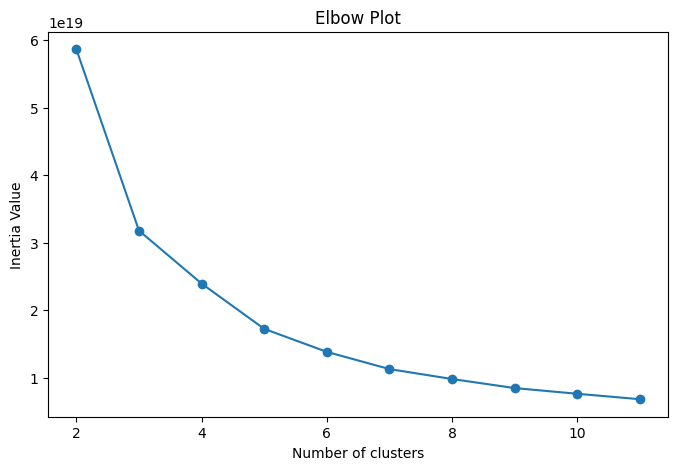

In [58]:
X = df_numerical_scaled.values
n_cluster = range(2, 12, 1)
cost = []

for i in n_cluster:
    model = KMeans(n_clusters=i, random_state=42, n_init=5)
    model.fit(X)
    cost.append(model.inertia_)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(n_cluster, cost, marker="o")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Inertia Value")
ax.set_title("Elbow Plot")
plt.show()

In [59]:
clustering_model = KMeans(n_clusters=5, random_state=42, n_init=5)
clustering_model.fit(X)

KMeans(n_clusters=5, n_init=5, random_state=42)

In [60]:
df_numerical_scaled['predicted_cluster'] = clustering_model.labels_
df_numerical_scaled['predicted_cluster'].value_counts()

4    1011
1     816
0     738
3     219
2      43
Name: predicted_cluster, dtype: int64

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

for i in range(5):
    sns.boxplot(x='predicted_cluster', y=df_numerical_scaled.iloc[:, i], data=df_numerical_scaled)
    plt.show()

In [62]:
df_numerical_scaled.columns

Index(['timestamp', 'revenue', 'runtime', 'vote_average', 'vote_count',
       'Genre_Adventure', 'Genre_Thriller', 'Genre_Action', 'Genre_Animation',
       'Genre_Horror', 'Genre_Fantasy', 'Genre_Comedy',
       'Genre_Science Fiction', 'Genre_Family', 'Genre_Drama', 'CountryUS',
       'CountryGB', 'CountryCA', 'CountryDE', 'CountryJP', 'CountryRU',
       'CountryFR', 'century_1800_Q4', 'century_1900_Q1', 'century_1900_Q2',
       'century_1900_Q3', 'century_1900_Q4', 'century_2000_Q1',
       'predicted_cluster'],
      dtype='object')

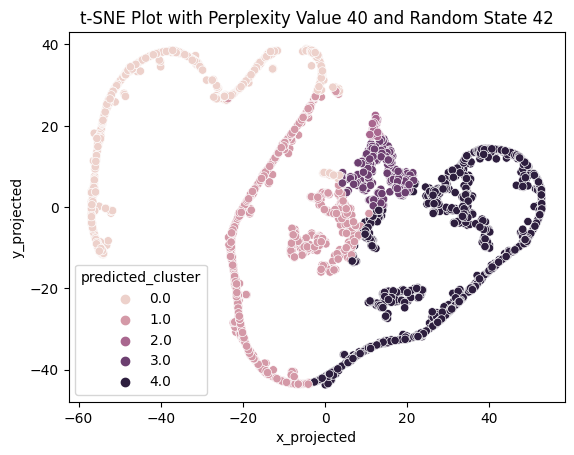

--------------------------------------------


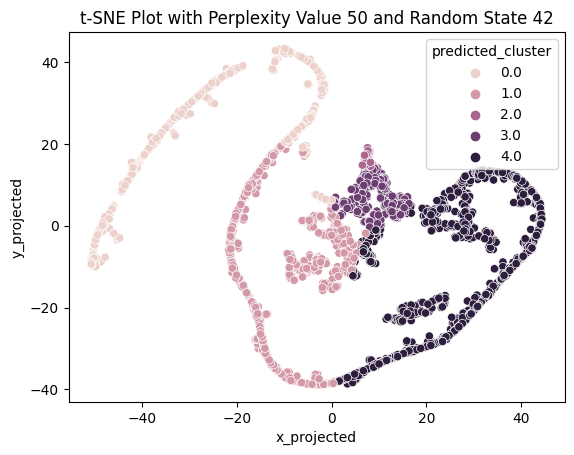

--------------------------------------------


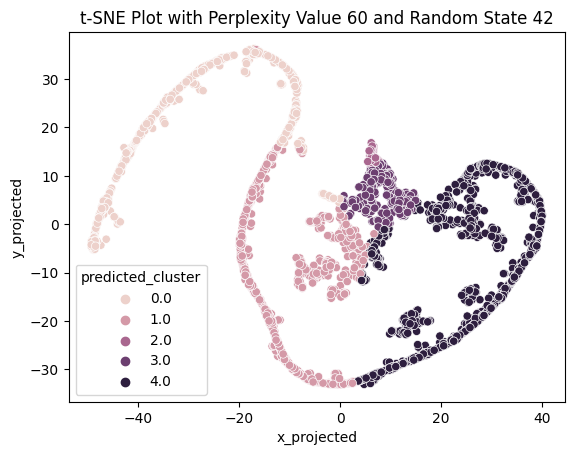

--------------------------------------------


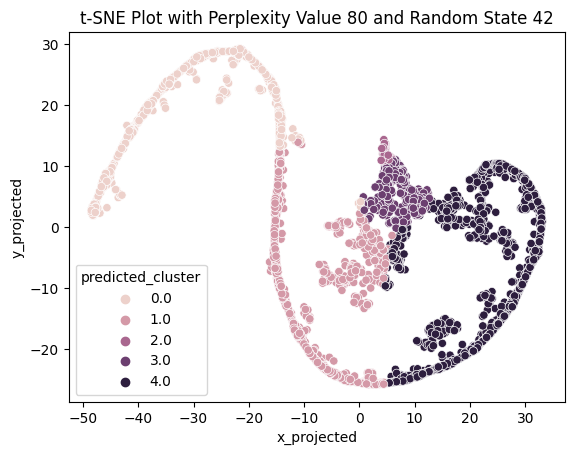

--------------------------------------------


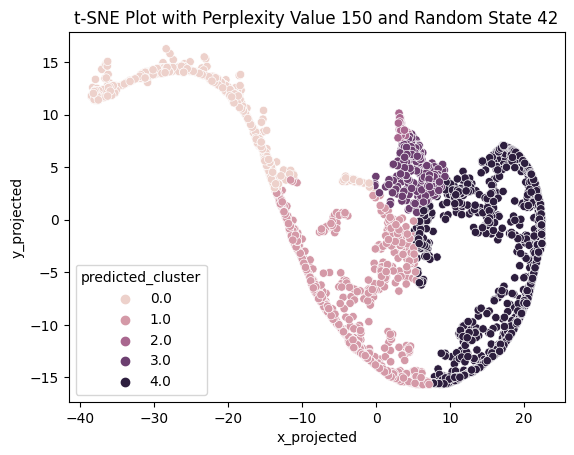

--------------------------------------------


In [69]:
for perp in [40, 50, 60, 80, 150]:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    data_tsne = tsne.fit_transform(df_numerical_scaled)
    df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
    df_combo = pd.concat([df_numerical_scaled, df_tsne], axis=1)
    sns.scatterplot(x='x_projected',y='y_projected',hue = 'predicted_cluster', data=df_combo)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, 42))
    plt.show()
    print('--------------------------------------------')

### K-Medoids

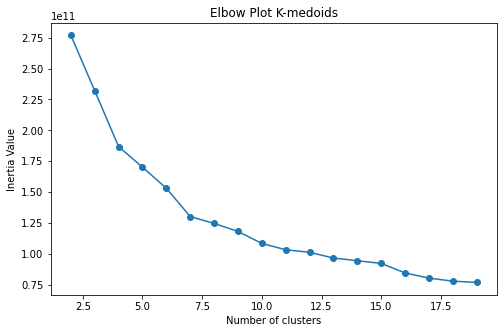

In [22]:
X = df_numerical_scaled.values
n_cluster = range(2, 20, 1)
cost = []

for i in n_cluster:
    model = KMedoids(n_clusters=i, random_state=42)
    model.fit(X)
    cost.append(model.inertia_)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(n_cluster, cost, marker="o")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Inertia Value")
ax.set_title("Elbow Plot K-medoids")
plt.show()

In [29]:
clustering_model_kmedoids = KMedoids(n_clusters=5, random_state=42)
clustering_model_kmedoids.fit(X)

df_numerical_scaled['predicted_cluster_kmedoids'] = clustering_model_kmedoids.labels_
df_numerical_scaled['predicted_cluster_kmedoids'].value_counts()

0    823
4    810
3    774
2    284
1    136
Name: predicted_cluster_kmedoids, dtype: int64

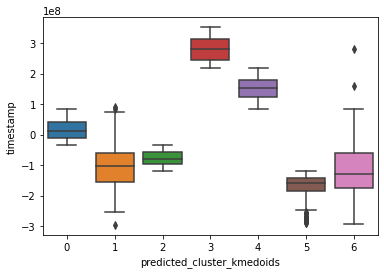

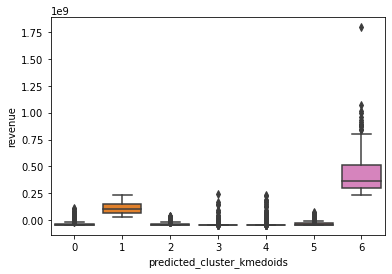

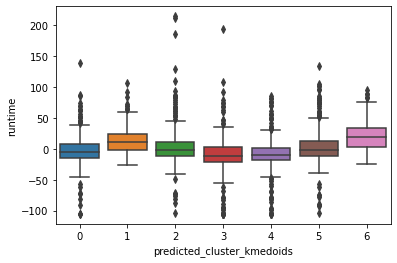

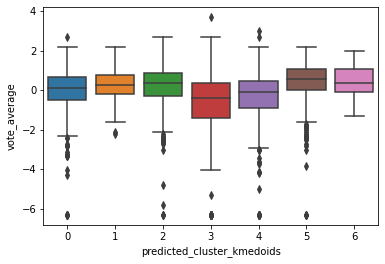

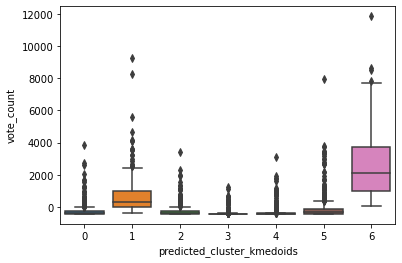

In [25]:
for i in range(5):
    sns.boxplot(x='predicted_cluster_kmedoids', y=df_numerical_scaled.iloc[:, i], data=df_numerical_scaled)
    plt.show()

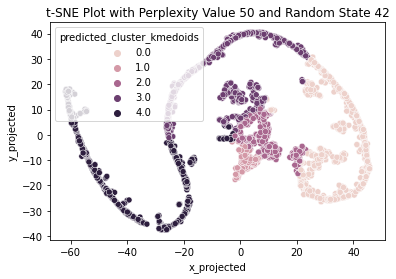

--------------------------------------------


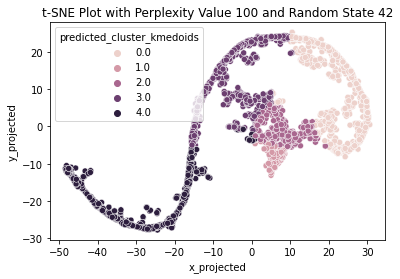

--------------------------------------------


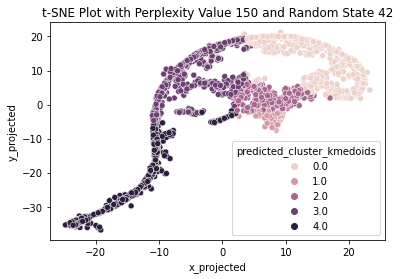

--------------------------------------------


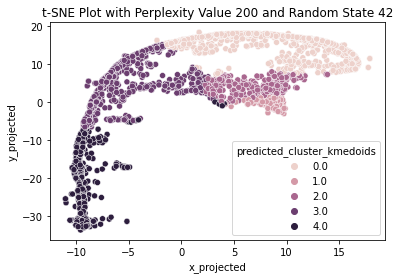

--------------------------------------------


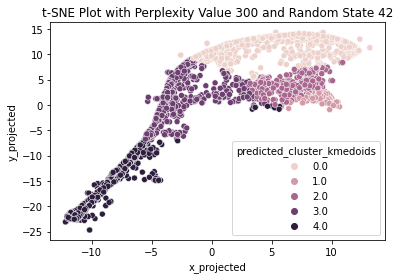

--------------------------------------------


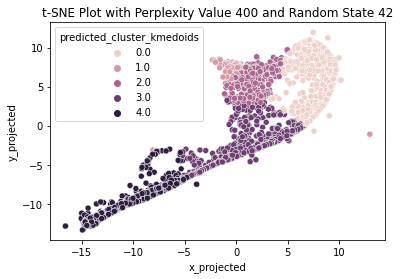

--------------------------------------------


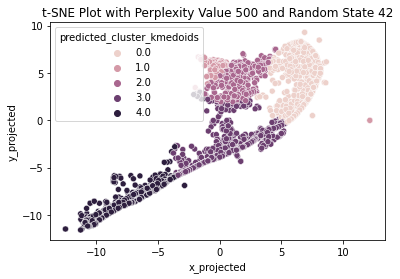

--------------------------------------------


In [30]:
for perp in [50, 100, 150, 200, 300, 400, 500]:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    data_tsne = tsne.fit_transform(df_numerical_scaled)
    df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
    df_combo = pd.concat([df_numerical_scaled, df_tsne], axis=1)
    sns.scatterplot(x='x_projected',y='y_projected',hue = 'predicted_cluster_kmedoids', data=df_combo)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, 42))
    plt.show()
    print('--------------------------------------------')

#### DBSCAN

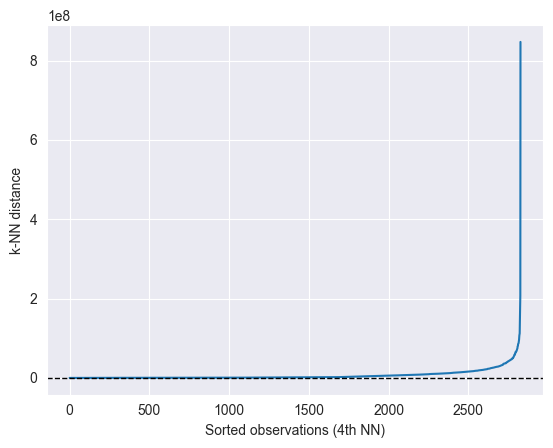

In [23]:
df_numerical_scaled = df_numerical_scaled.dropna()
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=1000).fit(df_numerical_scaled)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df_numerical_scaled)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=10000, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()



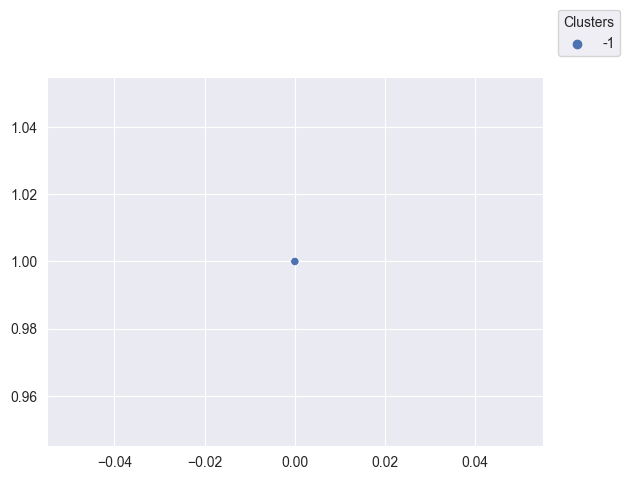

In [25]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=, min_samples=4).fit(df_numerical_scaled)
# get cluster labels
clusters.labels_ = clusters.labels_.flatten()
p = sns.scatterplot(data=df_numerical_scaled, x=0, y=1, hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()